# notch

In [1]:
from glob import glob
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

def draw_horizontal_split_violin_fixed(ax, data_t, data_b, pos, color_t, color_b,  bins_t=30, bins_b=30, bandwidth_t='scott', bandwidth_b='scott'):
    datasets = [data_t, data_b]
    sides = [1, -1]
    colors = [color_t, color_b]
    bins_all = [bins_t, bins_b]
    bandwidths = [bandwidth_t, bandwidth_b]
    heights = [0.5, 0.4]
    # labels = [label_t, label_b]

    # for data, side, color, label in zip(datasets, sides, colors, labels):
    for data, side, color, bins, bandwidth,height in zip(datasets, sides, colors, bins_all, bandwidths, heights):
        kde = scipy.stats.gaussian_kde(data, bw_method=bandwidth)
        x_range = np.linspace(data.min() - 0.5, data.max() + 0.5, 500)
        density = kde(x_range)

        counts, bin_edges = np.histogram(data, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = np.diff(bin_edges)

        scale_factor = 0.4 / density.max() # scale KDE and hist
        ax.bar(bin_centers, side * counts * scale_factor, width=bin_width, bottom=pos,
               color=color, alpha=0.4, edgecolor=None, zorder=1)
        # ax.fill_between(x_range, pos, pos + side * density * scale_factor,
        #                 color=color, alpha=0.4,  zorder=2)
        ax.plot(x_range, pos + side * density * scale_factor, color=color, lw=1.2, zorder=3)

        median_val = np.mean(data)
        ax.vlines(median_val, pos, pos + side * height, colors=color, linestyles=":", lw=1.5, zorder=4)

        va_type = 'bottom' if side > 0 else 'top'
        offset_x = 0.5
        offset_y = -1 * side * 0.1
        ax.text(
            x=median_val + offset_x,
            y=pos + side * height + offset_y,
            s=f"{median_val:.2f}",
            color=color,
            fontsize=15,
            # fontweight='bold',
            ha='center',
            va=va_type,
            zorder=6
        )


In [2]:
file_list = glob("outdir_notch_GW150914noise_version3.5_psd0.5_rwalk/*57*_all.csv")
file_list.sort()
tem = glob("outdir_nonotch_GW150914noise_version3.5_psd0.5_rwalk/*57*.csv")
tem.sort()
file_list= file_list + tem
tem = glob("outdir_notch_GW231226noise_version3.5_psd0.5_rwalk/*72*_all.csv")
tem.sort()
file_list= file_list + tem
tem = glob("outdir_nonotch_GW231226noise_version3.5_psd0.5_rwalk/*72*.csv")
tem.sort()
file_list= file_list + tem
file_list

['outdir_notch_GW150914noise_version3.5_psd0.5_rwalk/GW150914_ndata=25_npoint=1000_duration=57_newlikelihood_all.csv',
 'outdir_notch_GW150914noise_version3.5_psd0.5_rwalk/GW150914_ndata=25_npoint=1000_duration=57_oldlikelihood_all.csv',
 'outdir_nonotch_GW150914noise_version3.5_psd0.5_rwalk/GW150914_ndata=25_npoint=1000_duration=57_newlikelihood_all.csv',
 'outdir_nonotch_GW150914noise_version3.5_psd0.5_rwalk/GW150914_ndata=25_npoint=1000_duration=57_oldlikelihood_all.csv',
 'outdir_notch_GW231226noise_version3.5_psd0.5_rwalk/GW231226_ndata=25_npoint=1000_duration=72_newlikelihood_all.csv',
 'outdir_notch_GW231226noise_version3.5_psd0.5_rwalk/GW231226_ndata=25_npoint=1000_duration=72_oldlikelihood_all.csv',
 'outdir_nonotch_GW231226noise_version3.5_psd0.5_rwalk/GW231226_ndata=25_npoint=1000_duration=72_newlikelihood_all.csv',
 'outdir_nonotch_GW231226noise_version3.5_psd0.5_rwalk/GW231226_ndata=25_npoint=1000_duration=72_oldlikelihood_all.csv']

In [3]:
colorlist = ['C0',"C1","gray","gray",'C0',"C1","gray","gray",]

In [4]:
num_pairs = len(file_list) // 2
# fig, ax = plt.subplots(figsize=(12, 2 * num_pairs))

for i in range(num_pairs):
    y_pos = num_pairs - i
    print(f"Processing pair {i+1} at y position {y_pos}")

Processing pair 1 at y position 4
Processing pair 2 at y position 3
Processing pair 3 at y position 2
Processing pair 4 at y position 1


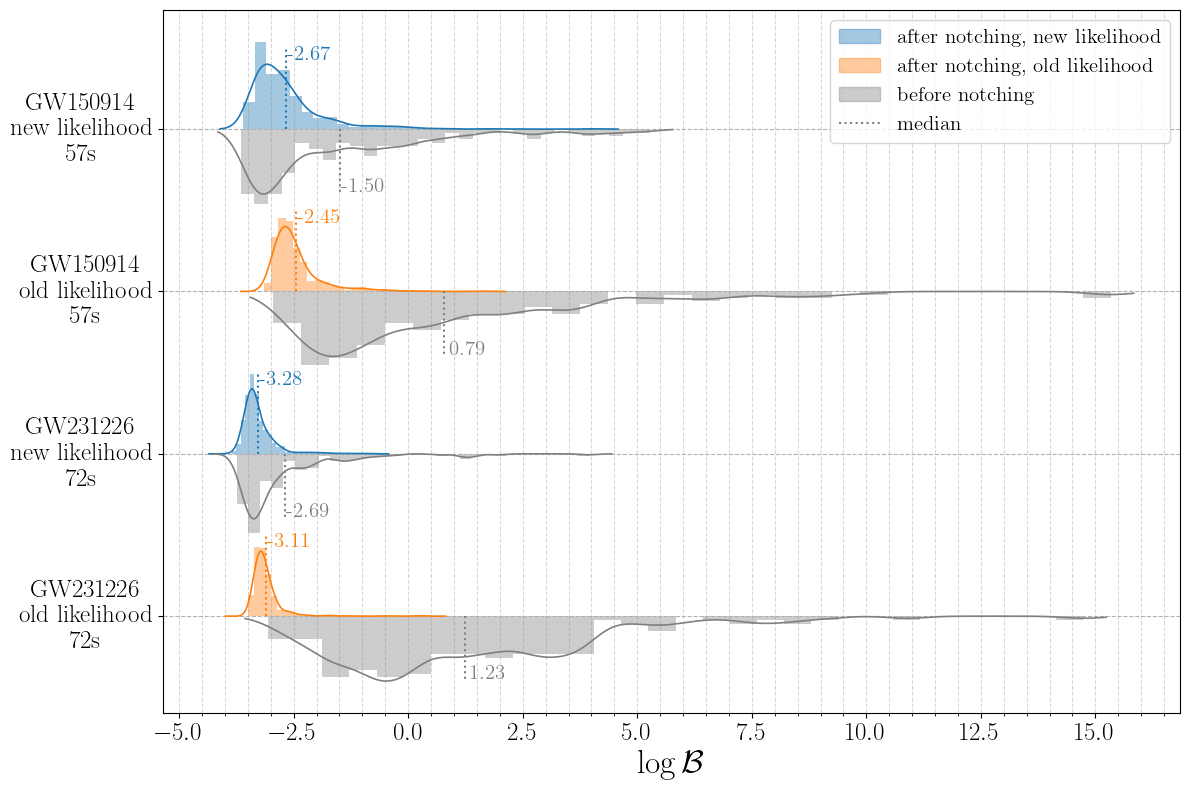

In [5]:
num_pairs = 4
from matplotlib.ticker import FixedLocator
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(12, 2 * num_pairs))
y_pos = num_pairs
for i in [0,1,4,5]:
    index_notch = i
    index_nonotch = i + 2
    draw_horizontal_split_violin_fixed(
        ax,
        pd.read_csv(file_list[index_notch])["logB"],
        pd.read_csv(file_list[index_nonotch])["logB"],
        pos=y_pos,
        color_t=colorlist[index_notch], color_b=colorlist[index_nonotch],
        bins_b=30, bandwidth_b=0.15
        # label_t=labellist[index_notch], label_b=labellist[index_nonotch]
    )
    y_pos -= 1
ax.set_yticks(range(1, num_pairs + 1))
ax.grid(axis='y', linestyle='--', alpha=1)
ax.xaxis.set_minor_locator(FixedLocator(np.arange(-5,17,0.5)))
ax.grid(True, which='both', axis='x', linestyle='--', color='gray', alpha=0.3)

labels = [
    'GW231226 \n old likelihood \n 72s',
    'GW231226 \n new likelihood \n 72s',
    'GW150914 \n old likelihood \n 57s',
    'GW150914 \n new likelihood \n 57s'
]
ax.set_yticklabels(labels, fontsize=18, ha='right', va='center')
for label in ax.get_yticklabels():
    label.set_multialignment('center')

ax.set_xlabel(r'$\log \mathcal{B}$',fontsize = 24)
patch1 = mpatches.Patch(color='C0', alpha=0.4, label='after notching, new likelihood')
patch2 = mpatches.Patch(color='C1', alpha=0.4, label='after notching, old likelihood')
patch3 = mpatches.Patch(color='gray', alpha=0.4, label='before notching')
line1 = mlines.Line2D([], [], color='gray', linestyle=':', label='median')
plt.legend(handles=[patch1, patch2, patch3, line1], loc=1,fontsize = 15)
plt.xticks(fontsize = 18)
plt.tight_layout()
plt.savefig("comparison_logB_notch.pdf")
plt.show()

# event

In [6]:
from glob import glob
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import os

def draw_horizontal_split_violin_fixed(ax, data_t, data_b,data_event_t,data_event_b ,pos, color_t, color_b,
                                       bins_t=50, bins_b=50, bandwidth_t='scott', bandwidth_b='scott',
                                    #    event_labelloc_t=1, event_labelloc_b=1
                                       ):
    datasets = [data_t, data_b]
    data_events = [data_event_t, data_event_b]
    sides = [1, -1]
    colors = [color_t, color_b]
    bins_all = [bins_t, bins_b]
    bandwidths = [bandwidth_t, bandwidth_b]
    heights = [0.5, 0.5]
    # event_labellocs = [event_labelloc_t, event_labelloc_b]
    # labels = [label_t, label_b]

    # for data, side, color, label in zip(datasets, sides, colors, labels):
    # for data, data_event, side, color, bins, bandwidth, height, event_labelloc in zip(datasets, data_events, sides, colors, bins_all, bandwidths, heights, event_labellocs):
    for data, data_event, side, color, bins, bandwidth, height in zip(datasets, data_events, sides, colors, bins_all, bandwidths, heights):
        kde = scipy.stats.gaussian_kde(data, bw_method=bandwidth)
        x_range = np.linspace(data.min() - 0.5, data.max() + 0.5, 500)
        density = kde(x_range)

        counts, bin_edges = np.histogram(data, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = np.diff(bin_edges)

        scale_factor = 0.3 / density.max() # scale KDE and hist
        ax.bar(bin_centers, side * counts * scale_factor, width=bin_width, bottom=pos,
               color=color, alpha=0.4, edgecolor=None, zorder=1)
        # ax.fill_between(x_range, pos, pos + side * density * scale_factor,
        #                 color=color, alpha=0.4,  zorder=2)
        ax.plot(x_range, pos + side * density * scale_factor, color=color, lw=1.2, zorder=3)

        median_val = np.mean(data)
        ax.vlines(median_val, pos, pos + side * height, colors=color, linestyles=":", lw=1.5, zorder=4)

        va_type = 'bottom' if side > 0 else 'top'
        offset_x = 0.4
        offset_y = -1 * side * 0.15
        ax.text(
            x=median_val + offset_x,
            y=pos + side * height + offset_y,
            s=f"{median_val:.2f}",
            color=color,
            fontsize=15,
            # fontweight='bold',
            ha='center',
            va=va_type,
            zorder=6)

        data_event = np.atleast_1d(data_event)
        if len(data_event) > 1:
            raise ValueError(f"Error at pos {pos}: data_event should be a single value, but got {len(data_event)} elements.")
        event_val = data_event[0]

        # ax.vlines(event_val, pos, pos + side * height, colors=color, linestyles=":", lw=1.5, zorder=4)
        # va_type = 'bottom' if side > 0 else 'top'
        # # if event_labelloc == 1:
        # #     offset_x = 0.3
        # # if event_labelloc == -1:
        # #     offset_x = -0.25
        # offset_y = -1 * side * 0.1
        # ax.text(
        #     x=event_val + offset_x,
        #     y=pos + side * height + offset_y,
        #     s=f"{event_val:.2f}",
        #     color=color,
        #     fontsize=15,
        #     # fontweight='bold',
        #     ha='center',
        #     va=va_type,
        #     zorder=6
        # )

        p_value = np.sum(data >= event_val) / len(data)
        print('p-value=',p_value,'logB', event_val)
        # ax.text(
        #     x=0,
        #     y=pos + side * height * 0.3,
        #     s=r'$p$-value='+f"{p_value:.3f}",
        #     color=color,
        #     fontsize=15,
        #     ha='center',
        #     va=va_type,
        #     zorder=6
        # )

In [7]:
events_config = [
    {
        'name': 'GW150914',
        'durations': np.array([114, 57]),
    },
    {
        'name': 'GW231226',
        'durations': np.array([145, 72]),
    },
    {
        'name': 'GW250114',
        'durations': np.array([58]),
    }
]

## logB

In [8]:
background_file_list = []
event_file_list = []
labellist = []
colorlist = []

for event in events_config:
    event_name = event['name']
    for duration in event['durations']:
        path_pattern_background = f"outdir_notch_{event_name}noise_version3.5_psd0.5_rwalk/*{duration}*_all.csv"
        matched_files_background = glob(path_pattern_background)

        path_pattern_event = f"outdir_{event_name}_event_version3.5_psd0.5_rwalk/*{duration}*_all.csv"
        matched_files_event = glob(path_pattern_event)

        matched_files_background.sort()
        matched_files_event.sort()

        for file_path in matched_files_background:
            background_file_list.append(file_path)
            label = f"{event_name}\n{duration}s"
            if label not in labellist:
                labellist.append(label)
            if 'new' in file_path:
                colorlist.append('C0')
            else:
                colorlist.append('C1')
        for file_path in matched_files_event:
            event_file_list.append(file_path)


p-value= 0.7666666666666667 logB -3.18778188944918
p-value= 0.6066666666666667 logB -2.0872273344003407
p-value= 0.588 logB -3.0098541852648704
p-value= 0.184 logB -2.2167673011123585
p-value= 1.0 logB -4.138943610339046
p-value= 0.9733333333333334 logB -3.409881282915383
p-value= 0.204 logB -3.12108722180664
p-value= 0.278 logB -3.072437138836193
p-value= 0.9333333333333333 logB -3.677671110550476
p-value= 0.35333333333333333 logB -3.202347810290654


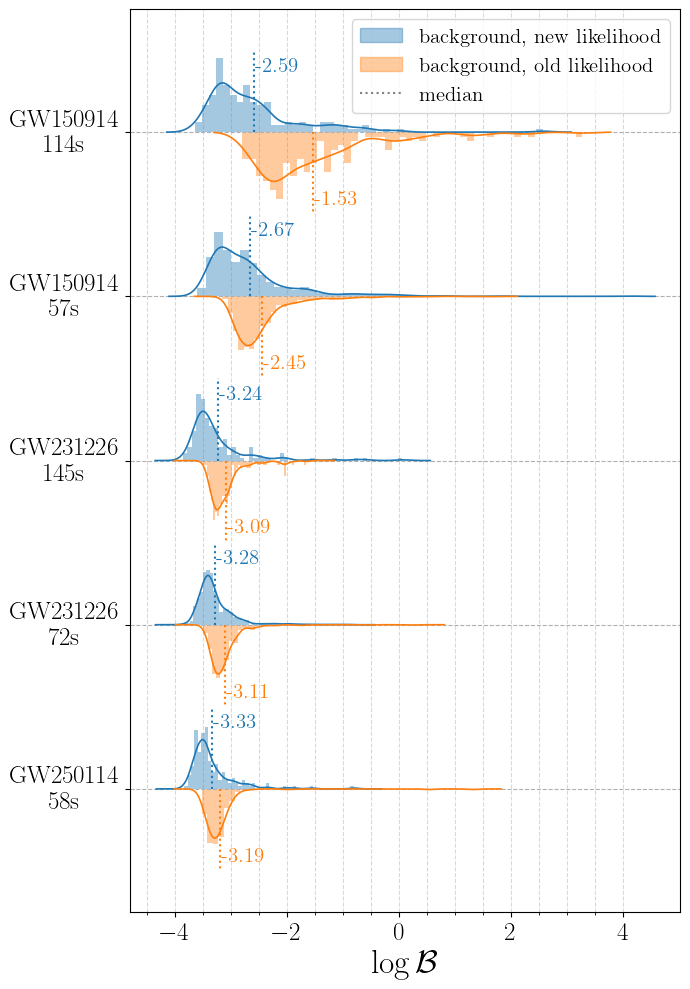

In [9]:
num_pairs = 5
from matplotlib.ticker import FixedLocator
# event_labelloc_list = [1, 1, 1, 1, -1, -1, 1, 1, -1, 1]
background_number_list = []
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(7, 2 * num_pairs))
y_pos = num_pairs
for i in [0,2,4,6,8]:
    index_new = i
    index_old = i + 1
    draw_horizontal_split_violin_fixed(
        ax,
        pd.read_csv(background_file_list[index_new])["logB"],
        pd.read_csv(background_file_list[index_old])["logB"],
        pd.read_csv(event_file_list[index_new])["logB"],
        pd.read_csv(event_file_list[index_old])["logB"],
        pos=y_pos,
        color_t=colorlist[index_new], color_b=colorlist[index_old],
        bandwidth_t=0.2, bandwidth_b=0.2,
        # event_labelloc_t=event_labelloc_list[index_new], event_labelloc_b=event_labelloc_list[index_old]
    )
    y_pos -= 1
ax.set_yticks(range(1, num_pairs + 1))
ax.grid(axis='y', linestyle='--', alpha=1)
ax.xaxis.set_minor_locator(FixedLocator(np.arange(-5,4,0.5)))
ax.grid(True, which='both', axis='x', linestyle='--', color='gray', alpha=0.3)
# labels = [
#     'GW231226 \n oldlikelihood \n 72s',
#     'GW231226 \n newlikelihood \n 72s',
#     'GW150914 \n oldlikelihood \n 57s',
#     'GW150914 \n newlikelihood \n 57s'
# ]
ax.set_yticklabels(labellist[::-1], fontsize=18, ha='right', va='center')
for label in ax.get_yticklabels():
    label.set_multialignment('center')

ax.set_xlabel(r'$\log \mathcal{B}$',fontsize = 24)
patch1 = mpatches.Patch(color='C0', alpha=0.4, label='background, new likelihood')
patch2 = mpatches.Patch(color='C1', alpha=0.4, label='background, old likelihood')
# patch3 = mpatches.Patch(color='gray', alpha=0.4, label='before notching')
line1 = mlines.Line2D([], [], color='gray', linestyle=':', label='median')
plt.legend(handles=[patch1, patch2, line1], loc=1,fontsize = 15)
plt.xticks(fontsize = 18)
plt.tight_layout()
# plt.savefig("background_logB.pdf")
plt.show()

## SNR

In [10]:
from glob import glob
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import os

def draw_horizontal_split_violin_fixed_SNR(ax, data_t, data_b, pos, color_t, color_b,
                                       bins_t=50, bins_b=50, bandwidth_t='scott', bandwidth_b='scott',
                                    #    event_labelloc_t=1, event_labelloc_b=1
                                       ):
    datasets = [data_t, data_b]
    sides = [1, -1]
    colors = [color_t, color_b]
    bins_all = [bins_t, bins_b]
    bandwidths = [bandwidth_t, bandwidth_b]
    heights = [0.5, 0.5]
    # event_labellocs = [event_labelloc_t, event_labelloc_b]
    # labels = [label_t, label_b]

    # for data, side, color, label in zip(datasets, sides, colors, labels):
    # for data, data_event, side, color, bins, bandwidth, height, event_labelloc in zip(datasets, data_events, sides, colors, bins_all, bandwidths, heights, event_labellocs):
    for data,  side, color, bins, bandwidth, height in zip(datasets,  sides, colors, bins_all, bandwidths, heights):
        kde = scipy.stats.gaussian_kde(data, bw_method=bandwidth)
        x_range = np.linspace(data.min() - 0.5, data.max() + 0.5, 500)
        density = kde(x_range)

        counts, bin_edges = np.histogram(data, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = np.diff(bin_edges)

        scale_factor = 0.3 / density.max() # scale KDE and hist
        ax.bar(bin_centers, side * counts * scale_factor, width=bin_width, bottom=pos,
               color=color, alpha=0.4, edgecolor=None, zorder=1)
        # ax.fill_between(x_range, pos, pos + side * density * scale_factor,
        #                 color=color, alpha=0.4,  zorder=2)
        ax.plot(x_range, pos + side * density * scale_factor, color=color, lw=1.2, zorder=3)

        median_val = np.mean(data)
        ax.vlines(median_val, pos, pos + side * height, colors=color, linestyles=":", lw=1.5, zorder=4)

        va_type = 'bottom' if side > 0 else 'top'
        offset_x = 2
        offset_y = -1 * side * 0.15
        ax.text(
            x=median_val + offset_x,
            y=pos + side * height + offset_y,
            s=f"{median_val:.2f}",
            color=color,
            fontsize=15,
            # fontweight='bold',
            ha='center',
            va=va_type,
            zorder=6)


In [11]:
background_snr_file_list = []
for event in events_config:
    event_name = event['name']
    for duration in event['durations']:

        path_pattern_background = f"SNR_csv/background_snr/*{event_name}*{duration}*.csv"
        matched_files_background = glob(path_pattern_background)

        # path_pattern_event = f"../../GW_ECHO_event/outdir_{event_name}_event_version3.5_psd0.5_rwalk/*{duration}*.csv"
        # matched_files_event = glob(path_pattern_event)

        matched_files_background.sort()
        # matched_files_event.sort()


        for file_path in matched_files_background:
            background_snr_file_list.append(file_path)

In [12]:
background_snr_file_list

['SNR_csv/background_snr/GW150914_duration114_new_combined_snr_data.csv',
 'SNR_csv/background_snr/GW150914_duration114_old_combined_snr_data.csv',
 'SNR_csv/background_snr/GW150914_duration57_new_combined_snr_data.csv',
 'SNR_csv/background_snr/GW150914_duration57_old_combined_snr_data.csv',
 'SNR_csv/background_snr/GW231226_duration145_new_combined_snr_data.csv',
 'SNR_csv/background_snr/GW231226_duration145_old_combined_snr_data.csv',
 'SNR_csv/background_snr/GW231226_duration72_new_combined_snr_data.csv',
 'SNR_csv/background_snr/GW231226_duration72_old_combined_snr_data.csv',
 'SNR_csv/background_snr/GW250114_duration58_new_combined_snr_data.csv',
 'SNR_csv/background_snr/GW250114_duration58_old_combined_snr_data.csv']

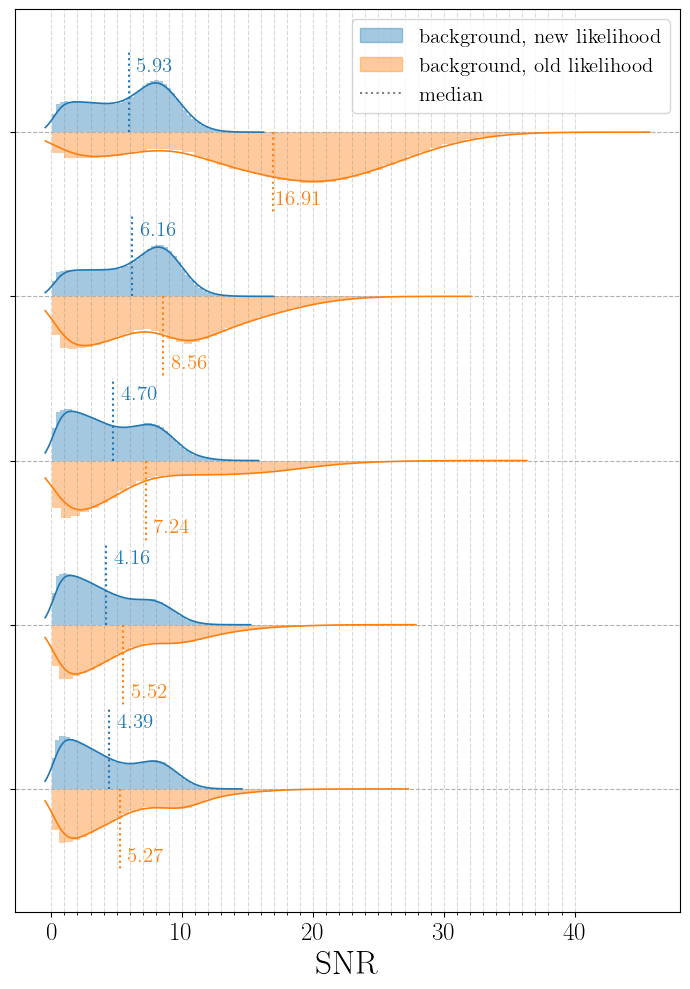

In [13]:
num_pairs = 5
from matplotlib.ticker import FixedLocator
# event_labelloc_list = [1, 1, 1, 1, -1, -1, 1, 1, -1, 1]
background_number_list = []
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(7, 2 * num_pairs))
y_pos = num_pairs
for i in [0,2,4,6,8]:
    index_new = i
    index_old = i + 1
    draw_horizontal_split_violin_fixed_SNR(
        ax,
        pd.read_csv(background_snr_file_list[index_new])["SNR"],
        pd.read_csv(background_snr_file_list[index_old])["SNR"],
        pos=y_pos,
        color_t=colorlist[index_new], color_b=colorlist[index_old],
        bandwidth_t=0.2, bandwidth_b=0.2,
    )
    y_pos -= 1
ax.set_yticks(range(1, num_pairs + 1))
ax.grid(axis='y', linestyle='--', alpha=1)
ax.xaxis.set_minor_locator(FixedLocator(np.arange(0,40,1)))
ax.grid(True, which='both', axis='x', linestyle='--', color='gray', alpha=0.3)
# labels = [
#     'GW231226 \n oldlikelihood \n 72s',
#     'GW231226 \n newlikelihood \n 72s',
#     'GW150914 \n oldlikelihood \n 57s',
#     'GW150914 \n newlikelihood \n 57s'
# ]
# ax.set_yticklabels(labellist[::-1], fontsize=18, ha='right', va='center')
# for label in ax.get_yticklabels():
#     label.set_multialignment('center')
ax.set_yticklabels(())

ax.set_xlabel('SNR',fontsize = 24)
patch1 = mpatches.Patch(color='C0', alpha=0.4, label='background, new likelihood')
patch2 = mpatches.Patch(color='C1', alpha=0.4, label='background, old likelihood')
# patch3 = mpatches.Patch(color='gray', alpha=0.4, label='before notching')
line1 = mlines.Line2D([], [], color='gray', linestyle=':', label='median')
plt.legend(handles=[patch1, patch2, line1], loc=1,fontsize = 15)
plt.xticks(fontsize = 18)
plt.tight_layout()
# plt.savefig("backdround_SNR.pdf")
plt.show()

## combine 2 figures together

p-value= 0.7666666666666667 logB -3.18778188944918
p-value= 0.6066666666666667 logB -2.0872273344003407


p-value= 0.588 logB -3.0098541852648704
p-value= 0.184 logB -2.2167673011123585
p-value= 1.0 logB -4.138943610339046
p-value= 0.9733333333333334 logB -3.409881282915383
p-value= 0.204 logB -3.12108722180664
p-value= 0.278 logB -3.072437138836193
p-value= 0.9333333333333333 logB -3.677671110550476
p-value= 0.35333333333333333 logB -3.202347810290654


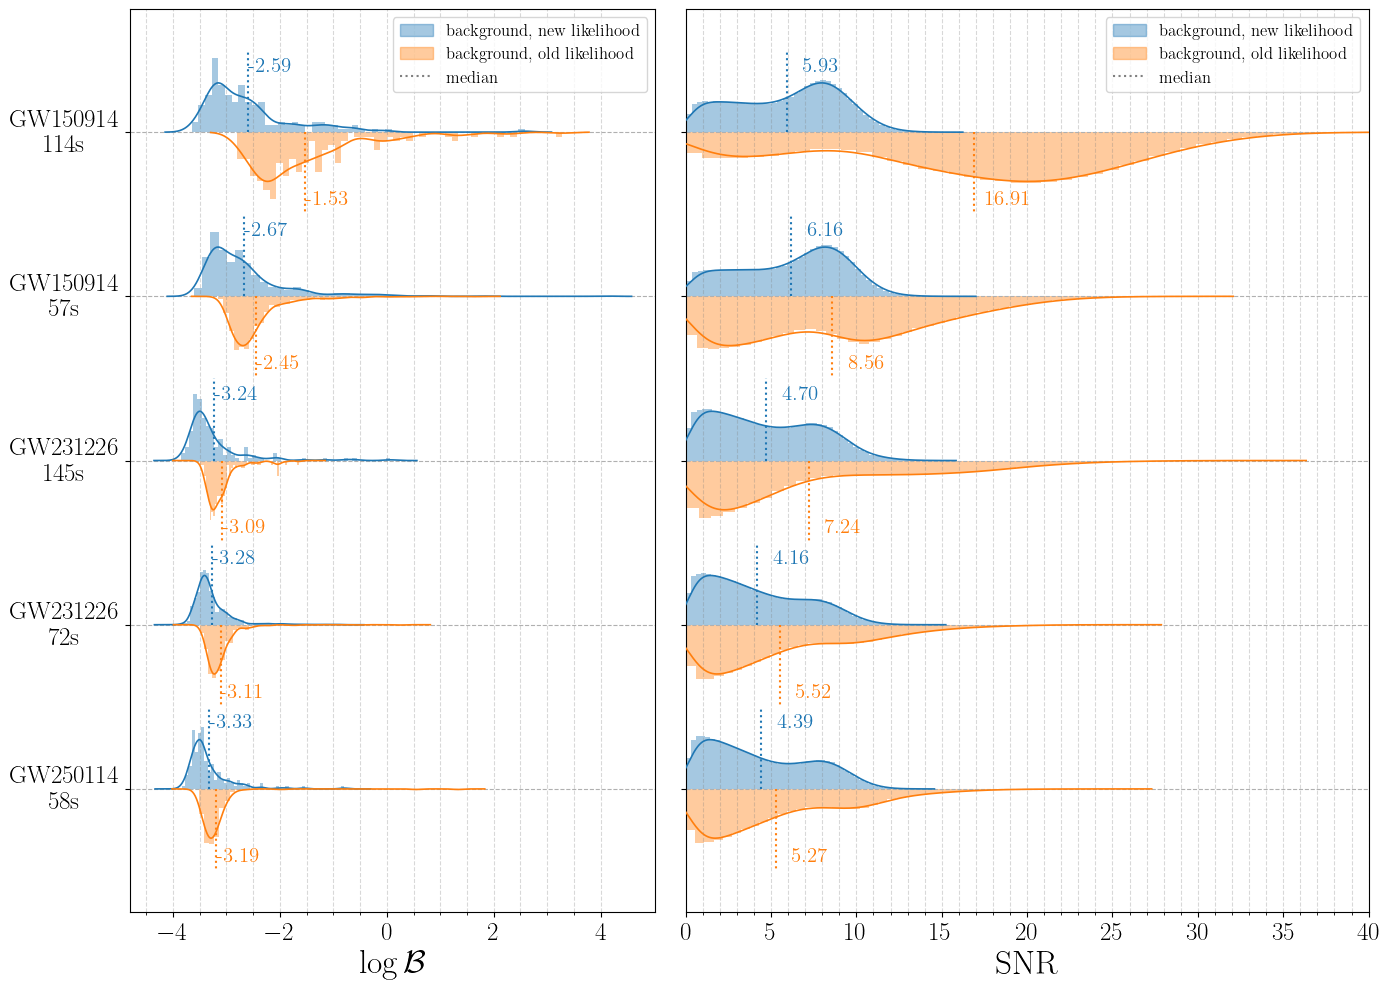

In [14]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
num_pairs = 5


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 2 * num_pairs),
                               gridspec_kw={'width_ratios': [1, 1.3]})

y_pos_base = num_pairs


for i in [0, 2, 4, 6, 8]:
    index_new = i
    index_old = i + 1
    current_y = y_pos_base - (i // 2)

    draw_horizontal_split_violin_fixed(
        ax1,
        pd.read_csv(background_file_list[index_new])["logB"],
        pd.read_csv(background_file_list[index_old])["logB"],
        pd.read_csv(event_file_list[index_new])["logB"],
        pd.read_csv(event_file_list[index_old])["logB"],
        pos=current_y,
        color_t=colorlist[index_new], color_b=colorlist[index_old],
        bandwidth_t=0.2, bandwidth_b=0.2
    )

    draw_horizontal_split_violin_fixed_SNR(
        ax2,
        pd.read_csv(background_snr_file_list[index_new])["SNR"],
        pd.read_csv(background_snr_file_list[index_old])["SNR"],
        pos=current_y,
        color_t=colorlist[index_new], color_b=colorlist[index_old],
        bandwidth_t=0.2, bandwidth_b=0.2
    )

ax1.set_yticks(range(1, num_pairs + 1))
ax1.grid(axis='y', linestyle='--', alpha=1)
ax1.xaxis.set_minor_locator(FixedLocator(np.arange(-5, 4, 0.5)))
ax1.grid(True, which='both', axis='x', linestyle='--', color='gray', alpha=0.3)
ax1.set_yticklabels(labellist[::-1], fontsize=18, ha='right', va='center')
for label in ax1.get_yticklabels():
    label.set_multialignment('center')
ax1.set_xlabel(r'$\log \mathcal{B}$', fontsize=24)

ax2.set_yticks(range(1, num_pairs + 1))
ax2.grid(axis='y', linestyle='--', alpha=1)
ax2.xaxis.set_minor_locator(FixedLocator(np.arange(0, 40, 1)))
ax2.grid(True, which='both', axis='x', linestyle='--', color='gray', alpha=0.3)
ax2.set_yticklabels(())
ax2.set_xlabel('SNR', fontsize=24)
ax2.set_xlim(0, 40)

patch1 = mpatches.Patch(color='C0', alpha=0.4, label='background, new likelihood')
patch2 = mpatches.Patch(color='C1', alpha=0.4, label='background, old likelihood')
line1 = mlines.Line2D([], [], color='gray', linestyle=':', label='median')

ax1.legend(handles=[patch1, patch2, line1], loc='upper right', fontsize=12)
ax2.legend(handles=[patch1, patch2, line1], loc='upper right', fontsize=12)

for ax in [ax1, ax2]:
    ax.tick_params(axis='both', labelsize=18)


plt.tight_layout()
plt.subplots_adjust(wspace=0.05)

plt.savefig("combined_background_plot.pdf")
plt.show()